## Convolutional Network
##### Exercise 3

### Import all needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import seaborn as sns
import tensorflow as tf
import numpy as np
import os
sns.set()

### Define Data source
Utensils recognition data divided into training and test data set

In [2]:
utensils_train = pd.read_csv('utensils/utensils_train.csv')
utensils_train.head(10)

,Label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,119,202,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
utensils_test = pd.read_csv('utensils dataset/utensils_test.csv')
utensils_test.head(10)

,Label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,55,92,237,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,2,205,211,0,0,0,0,0,0,0


### Convert the Labels into one-hot encoding 

In [4]:
y_encoder = OneHotEncoder(sparse=False)

#from Training data:
y_train_raw = utensils_train['Label'].values
y_train = y_encoder.fit_transform(y_train_raw.reshape(-1,1))

#for Test data
y_test_raw = utensils_test['Label'].values
y_test = y_encoder.fit_transform(y_test_raw.reshape(-1,1))

print("Train data: \n","------------------\n"," Raw: \n" ,y_train_raw[:5],"\n Encoded: \n",y_train[:5])
print("Test data: \n","------------------\n"," Raw: \n" ,y_test_raw[:5],"\n Encoded: \n",y_test[:5])

Train data: 
 ------------------
  Raw: 
 [0 0 2 1 0] 
 Encoded: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Test data: 
 ------------------
  Raw: 
 [2 1 2 0 1] 
 Encoded: 
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


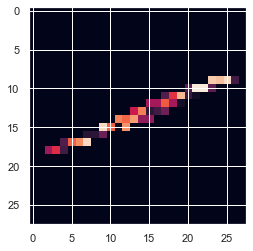

Lable: 0


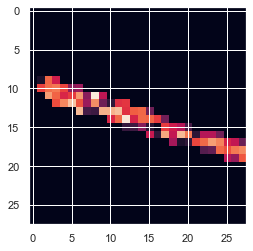

Lable: 0


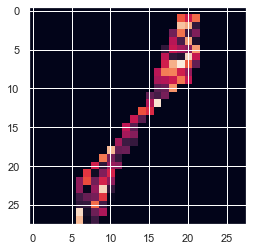

Lable: 2


In [5]:
#Training data
X_train = utensils_train.drop('Label', axis=1).values
X_train = X_train.reshape(-1,28,28,1)

#Verify training data
for i in range(3):
    plt.imshow(X_train[i].reshape(28,28))
    plt.show()
    print('Lable:',y_train_raw[i])


### Remove the labels to build the input features

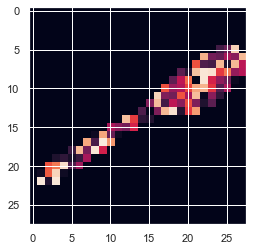

Lable: 2


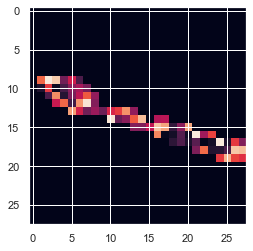

Lable: 1


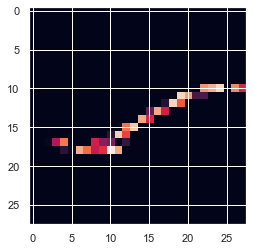

Lable: 2


In [6]:
#test data
X_test = utensils_test.drop('Label', axis=1).values
X_test = X_test.reshape(-1,28,28,1)

#Verify test data
for i in range(3):
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()
    print('Lable:',y_test_raw[i])


### Creating a Keras model
From exercise conditions:
1. Filter size N = 4 ( at least one)
2. Pooling should be Average Pooling
3. Should have at least 2 Dense layers

In [7]:
rate = 0.35
reg = tf.keras.regularizers.l2(l2=0.01)
init = tf.keras.initializers.GlorotUniform()

input_ = tf.keras.Input((28,28,1))
conv1 = tf.keras.layers.Conv2D(50, (4,4), activation='relu', kernel_regularizer=reg)(input_)
conv2 = tf.keras.layers.Conv2D(50, (4,4))(conv1)
bn1 = tf.keras.layers.BatchNormalization()(conv2)
relu01 = tf.keras.layers.ReLU()(bn1)
mp1 = tf.keras.layers.AveragePooling2D((2,2))(relu01)

conv3 = tf.keras.layers.Conv2D(70, (3,3), activation='relu', kernel_regularizer=reg)(mp1)
conv4 = tf.keras.layers.Conv2D(70, (3,3))(conv3)
bn2 = tf.keras.layers.BatchNormalization()(conv4)
relu02 = tf.keras.layers.ReLU()(bn2)
mp2 = tf.keras.layers.AveragePooling2D((2,2))(relu02)

fl = tf.keras.layers.Flatten()(mp2)
dense1 =tf.keras.layers.Dense(630)(fl)
drop1 = tf.keras.layers.Dropout(rate)(dense1)
relu1 = tf.keras.layers.ReLU()(drop1)

dense2 =tf.keras.layers.Dense(100)(relu1)
drop2 = tf.keras.layers.Dropout(rate)(dense2)
relu2 =  tf.keras.layers.ReLU()(drop2)

output=tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=reg)(relu2)
model = tf.keras.Model(inputs=input_,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 50)        850       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 50)        40050     
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 50)        200       
_________________________________________________________________
re_lu (ReLU)                 (None, 22, 22, 50)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 11, 11, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 70)          31570 

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00085)
metrics = [tf.keras.metrics.CategoricalAccuracy()]
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=metrics )

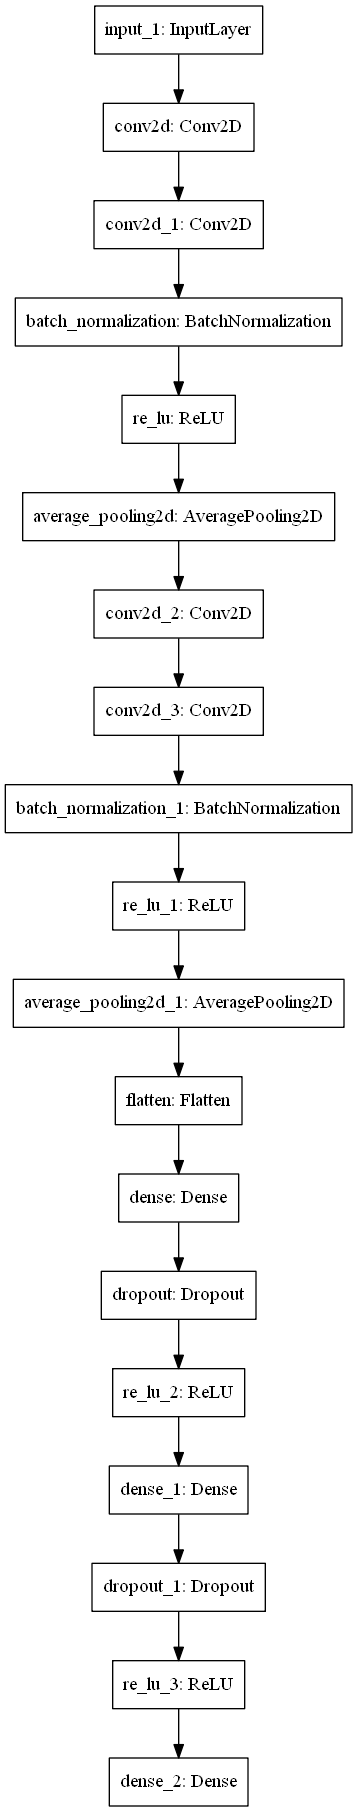

In [9]:
tf.keras.utils.plot_model(model)

### Defining the callbacks

In [10]:
#define early stop callbacks based on loss metric
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#define Model checkpoint Callback
MODEL_PATH = 'CNN-ex3/checkpoints/model_at_{epoch:02d}.ckpt'
BEST_PATH = 'CNN-ex3/checkpoints/best/best_model.ckpt'
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
os.makedirs(os.path.dirname(BEST_PATH), exist_ok=True)
model_checkpoint =tf.keras.callbacks.ModelCheckpoint(MODEL_PATH)
best_checkpoint =tf.keras.callbacks.ModelCheckpoint(BEST_PATH, save_best_only=True) 

### Training the model

In [11]:
history = model.fit(X_train, y_train, batch_size = 40, epochs =100, validation_split=0.25, callbacks=[early_stop,model_checkpoint,best_checkpoint])

Epoch 1/100
12/12 [==============================] - 2s 107ms/step - loss: 2.0258 - categorical_accuracy: 0.3599 - val_loss: 2.1673 - val_categorical_accuracy: 0.3250
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_01.ckpt\assets
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints/best\best_model.ckpt\assets
Epoch 2/100
12/12 [==============================] - 1s 79ms/step - loss: 1.7429 - categorical_accuracy: 0.4541 - val_loss: 1.7997 - val_categorical_accuracy: 0.3625
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_02.ckpt\assets
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints/best\best_model.ckpt\assets
Epoch 3/100
12/12 [==============================] - 1s 80ms/step - loss: 1.5792 - categorical_accuracy: 0.5033 - val_loss: 1.6588 - val_categorical_accuracy: 0.4938
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_03.ckpt\assets
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints/best\best_model.ckpt\assets
Epoch 4/100
12/

12/12 [==============================] - 1s 86ms/step - loss: 0.2808 - categorical_accuracy: 0.9794 - val_loss: 1.4002 - val_categorical_accuracy: 0.6187
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_29.ckpt\assets
Epoch 30/100
12/12 [==============================] - 1s 83ms/step - loss: 0.3399 - categorical_accuracy: 0.9556 - val_loss: 1.3246 - val_categorical_accuracy: 0.7000
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_30.ckpt\assets
Epoch 31/100
12/12 [==============================] - 1s 83ms/step - loss: 0.2645 - categorical_accuracy: 0.9722 - val_loss: 1.3386 - val_categorical_accuracy: 0.6562
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_31.ckpt\assets
Epoch 32/100
12/12 [==============================] - 1s 84ms/step - loss: 0.2791 - categorical_accuracy: 0.9696 - val_loss: 1.5678 - val_categorical_accuracy: 0.6750
INFO:tensorflow:Assets written to: CNN-ex3/checkpoints\model_at_32.ckpt\assets
Epoch 33/100
12/12 [=========

### Model results metrics

In [118]:
#Best model is chosen based on visualizing the results from checkpoints which has relatively higher accuracy result
#Chosen Model is the the one generated from the 36th epoch
best_model = tf.keras.models.load_model('CNN-ex3/checkpoints/model_at_36.ckpt')
y_pred = best_model.predict(X_test)

#### Trying to visualize some results

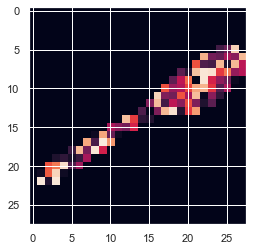

Prediction: [1.2463322e-04 7.5917540e-04 9.9911624e-01]
True value: 2
Predicted label: 2


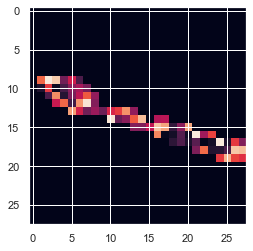

Prediction: [0.00850475 0.74309117 0.24840418]
True value: 1
Predicted label: 1


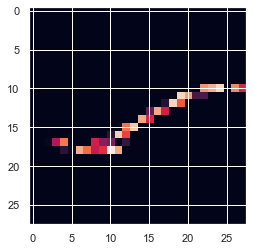

Prediction: [0.02143024 0.01522451 0.9633452 ]
True value: 2
Predicted label: 2


In [119]:
for i in range(3):
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()
    print('Prediction:',y_pred[i])
    print('True value:',y_test_raw[i])
    print('Predicted label:',np.argmax(y_pred[i]))

### Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix

#decoded the hot-encoded prediction results to match the form of the raw labels
y_pred_raw =np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_raw,y_pred_raw)
cm

array([[18,  0,  5],
       [ 1, 12,  8],
       [ 2,  6, 19]], dtype=int64)

### Heatmap

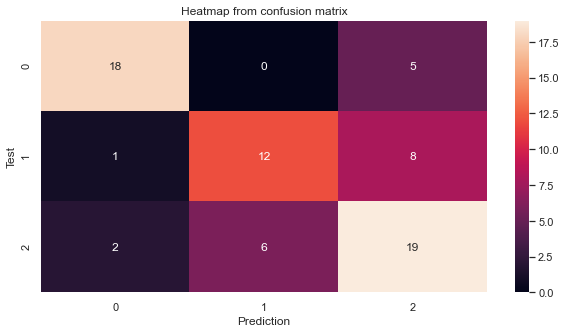

In [131]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(cm,annot=True)
plt.title('Heatmap from confusion matrix')
plt.ylabel("Test")
plt.xlabel("Prediction")
plt.show()

### Classification Report

In [122]:
print(classification_report(y_test_raw,y_pred_raw))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.67      0.57      0.62        21
           2       0.59      0.70      0.64        27

    accuracy                           0.69        71
   macro avg       0.71      0.69      0.69        71
weighted avg       0.70      0.69      0.69        71



The reported metrics for each category complies to the requirement of >33%

### Training Accuracy Chart

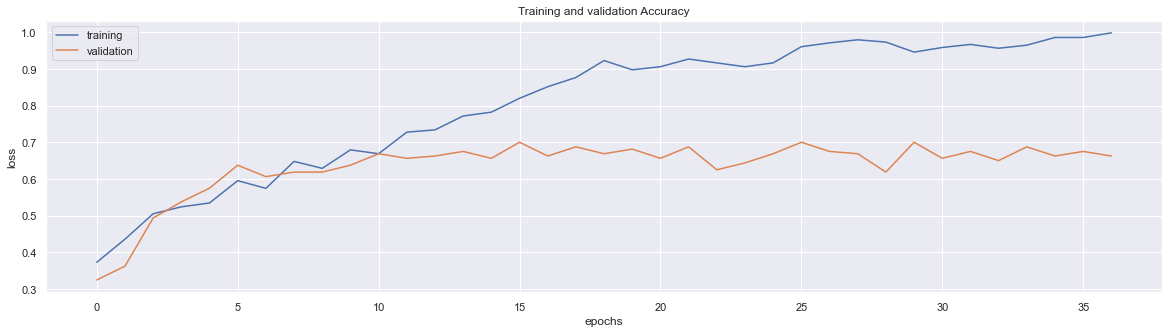

In [123]:
plt.figure(figsize=(20,5))
plt.plot(history.history[('categorical_accuracy')])
plt.plot(history.history[('val_categorical_accuracy')])
plt.legend(['training', 'validation'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and validation Accuracy")
plt.show()

### Training Loss Chart

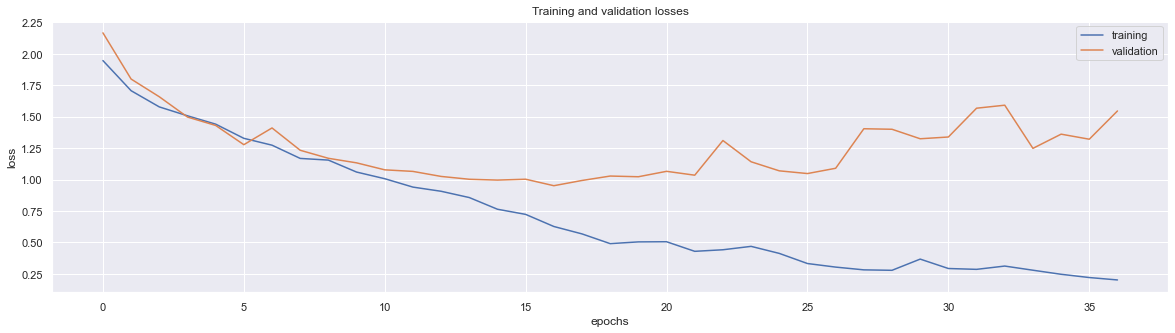

In [124]:
plt.figure(figsize=(20,5))
plt.plot(history.history[('loss')])
plt.plot(history.history[('val_loss')])
plt.legend(['training', 'validation'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and validation losses")
plt.show()